In \[44\]:

    # Importing the basic libraries we will require for the project

    # Libraries to help with reading and manipulating data
    import pandas as pd
    import numpy as np

    # Libaries to help with data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()

    # Importing the Machine Learning models we require from Scikit-Learn
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree
    from sklearn.ensemble import RandomForestClassifier

    # Importing the other functions we may require from Scikit-Learn
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

    # To get diferent metric scores
    from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

    # Code to ignore warnings from function usage
    import warnings;
    import numpy as np
    warnings.filterwarnings('ignore')

In \[45\]:

    hotel = pd.read_csv(r"C:\Users\psath\Downloads\INNHotelsGroup.csv")

In \[46\]:

    data = hotel.copy()

In \[47\]:

    data.head()

Out\[47\]:

|     | Booking_ID | no_of_adults | no_of_children | no_of_weekend_nights | no_of_week_nights | type_of_meal_plan | required_car_parking_space | room_type_reserved | lead_time | arrival_year | arrival_month | arrival_date | market_segment_type | repeated_guest | no_of_previous_cancellations | no_of_previous_bookings_not_canceled | avg_price_per_room | no_of_special_requests | booking_status |
|-----|------------|--------------|----------------|----------------------|-------------------|-------------------|----------------------------|--------------------|-----------|--------------|---------------|--------------|---------------------|----------------|------------------------------|--------------------------------------|--------------------|------------------------|----------------|
| 0   | INN00001   | 2            | 0              | 1                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 224       | 2017         | 10            | 2            | Offline             | 0              | 0                            | 0                                    | 65.00              | 0                      | Not_Canceled   |
| 1   | INN00002   | 2            | 0              | 2                    | 3                 | Not Selected      | 0                          | Room_Type 1        | 5         | 2018         | 11            | 6            | Online              | 0              | 0                            | 0                                    | 106.68             | 1                      | Not_Canceled   |
| 2   | INN00003   | 1            | 0              | 2                    | 1                 | Meal Plan 1       | 0                          | Room_Type 1        | 1         | 2018         | 2             | 28           | Online              | 0              | 0                            | 0                                    | 60.00              | 0                      | Canceled       |
| 3   | INN00004   | 2            | 0              | 0                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 211       | 2018         | 5             | 20           | Online              | 0              | 0                            | 0                                    | 100.00             | 0                      | Canceled       |
| 4   | INN00005   | 2            | 0              | 1                    | 1                 | Not Selected      | 0                          | Room_Type 1        | 48        | 2018         | 4             | 11           | Online              | 0              | 0                            | 0                                    | 94.50              | 0                      | Canceled       |

In \[48\]:

    data.tail()

Out\[48\]:

|       | Booking_ID | no_of_adults | no_of_children | no_of_weekend_nights | no_of_week_nights | type_of_meal_plan | required_car_parking_space | room_type_reserved | lead_time | arrival_year | arrival_month | arrival_date | market_segment_type | repeated_guest | no_of_previous_cancellations | no_of_previous_bookings_not_canceled | avg_price_per_room | no_of_special_requests | booking_status |
|-------|------------|--------------|----------------|----------------------|-------------------|-------------------|----------------------------|--------------------|-----------|--------------|---------------|--------------|---------------------|----------------|------------------------------|--------------------------------------|--------------------|------------------------|----------------|
| 36270 | INN36271   | 3            | 0              | 2                    | 6                 | Meal Plan 1       | 0                          | Room_Type 4        | 85        | 2018         | 8             | 3            | Online              | 0              | 0                            | 0                                    | 167.80             | 1                      | Not_Canceled   |
| 36271 | INN36272   | 2            | 0              | 1                    | 3                 | Meal Plan 1       | 0                          | Room_Type 1        | 228       | 2018         | 10            | 17           | Online              | 0              | 0                            | 0                                    | 90.95              | 2                      | Canceled       |
| 36272 | INN36273   | 2            | 0              | 2                    | 6                 | Meal Plan 1       | 0                          | Room_Type 1        | 148       | 2018         | 7             | 1            | Online              | 0              | 0                            | 0                                    | 98.39              | 2                      | Not_Canceled   |
| 36273 | INN36274   | 2            | 0              | 0                    | 3                 | Not Selected      | 0                          | Room_Type 1        | 63        | 2018         | 4             | 21           | Online              | 0              | 0                            | 0                                    | 94.50              | 0                      | Canceled       |
| 36274 | INN36275   | 2            | 0              | 1                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 207       | 2018         | 12            | 30           | Offline             | 0              | 0                            | 0                                    | 161.67             | 0                      | Not_Canceled   |

In \[49\]:

    #Check the shape of the data set
    data.shape

Out\[49\]:

    (36275, 19)

The dataset has 36275 rows and 19 columns

In \[50\]:

    #Check the data types of the columns in data set
    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 36275 entries, 0 to 36274
    Data columns (total 19 columns):
     #   Column                                Non-Null Count  Dtype  
    ---  ------                                --------------  -----  
     0   Booking_ID                            36275 non-null  object 
     1   no_of_adults                          36275 non-null  int64  
     2   no_of_children                        36275 non-null  int64  
     3   no_of_weekend_nights                  36275 non-null  int64  
     4   no_of_week_nights                     36275 non-null  int64  
     5   type_of_meal_plan                     36275 non-null  object 
     6   required_car_parking_space            36275 non-null  int64  
     7   room_type_reserved                    36275 non-null  object 
     8   lead_time                             36275 non-null  int64  
     9   arrival_year                          36275 non-null  int64  
     10  arrival_month                         36275 non-null  int64  
     11  arrival_date                          36275 non-null  int64  
     12  market_segment_type                   36275 non-null  object 
     13  repeated_guest                        36275 non-null  int64  
     14  no_of_previous_cancellations          36275 non-null  int64  
     15  no_of_previous_bookings_not_canceled  36275 non-null  int64  
     16  avg_price_per_room                    36275 non-null  float64
     17  no_of_special_requests                36275 non-null  int64  
     18  booking_status                        36275 non-null  object 
    dtypes: float64(1), int64(13), object(5)
    memory usage: 5.3+ MB

No Null values

In \[51\]:

    #Check for Duplicate values
    data.duplicated().sum()

Out\[51\]:

    0

In \[52\]:

    # Dropping the Booking ID column as its dont have any predictive power
    data = data.drop(["Booking_ID"], axis=1)

In \[53\]:

    data.head()

Out\[53\]:

|     | no_of_adults | no_of_children | no_of_weekend_nights | no_of_week_nights | type_of_meal_plan | required_car_parking_space | room_type_reserved | lead_time | arrival_year | arrival_month | arrival_date | market_segment_type | repeated_guest | no_of_previous_cancellations | no_of_previous_bookings_not_canceled | avg_price_per_room | no_of_special_requests | booking_status |
|-----|--------------|----------------|----------------------|-------------------|-------------------|----------------------------|--------------------|-----------|--------------|---------------|--------------|---------------------|----------------|------------------------------|--------------------------------------|--------------------|------------------------|----------------|
| 0   | 2            | 0              | 1                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 224       | 2017         | 10            | 2            | Offline             | 0              | 0                            | 0                                    | 65.00              | 0                      | Not_Canceled   |
| 1   | 2            | 0              | 2                    | 3                 | Not Selected      | 0                          | Room_Type 1        | 5         | 2018         | 11            | 6            | Online              | 0              | 0                            | 0                                    | 106.68             | 1                      | Not_Canceled   |
| 2   | 1            | 0              | 2                    | 1                 | Meal Plan 1       | 0                          | Room_Type 1        | 1         | 2018         | 2             | 28           | Online              | 0              | 0                            | 0                                    | 60.00              | 0                      | Canceled       |
| 3   | 2            | 0              | 0                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 211       | 2018         | 5             | 20           | Online              | 0              | 0                            | 0                                    | 100.00             | 0                      | Canceled       |
| 4   | 2            | 0              | 1                    | 1                 | Not Selected      | 0                          | Room_Type 1        | 48        | 2018         | 4             | 11           | Online              | 0              | 0                            | 0                                    | 94.50              | 0                      | Canceled       |

Question 1: Check the summary statistics of the dataset and write your
observations

In \[54\]:

    data.describe().T

Out\[54\]:

|                                      | count   | mean        | std       | min    | 25%    | 50%     | 75%    | max    |
|--------------------------------------|---------|-------------|-----------|--------|--------|---------|--------|--------|
| no_of_adults                         | 36275.0 | 1.844962    | 0.518715  | 0.0    | 2.0    | 2.00    | 2.0    | 4.0    |
| no_of_children                       | 36275.0 | 0.105279    | 0.402648  | 0.0    | 0.0    | 0.00    | 0.0    | 10.0   |
| no_of_weekend_nights                 | 36275.0 | 0.810724    | 0.870644  | 0.0    | 0.0    | 1.00    | 2.0    | 7.0    |
| no_of_week_nights                    | 36275.0 | 2.204300    | 1.410905  | 0.0    | 1.0    | 2.00    | 3.0    | 17.0   |
| required_car_parking_space           | 36275.0 | 0.030986    | 0.173281  | 0.0    | 0.0    | 0.00    | 0.0    | 1.0    |
| lead_time                            | 36275.0 | 85.232557   | 85.930817 | 0.0    | 17.0   | 57.00   | 126.0  | 443.0  |
| arrival_year                         | 36275.0 | 2017.820427 | 0.383836  | 2017.0 | 2018.0 | 2018.00 | 2018.0 | 2018.0 |
| arrival_month                        | 36275.0 | 7.423653    | 3.069894  | 1.0    | 5.0    | 8.00    | 10.0   | 12.0   |
| arrival_date                         | 36275.0 | 15.596995   | 8.740447  | 1.0    | 8.0    | 16.00   | 23.0   | 31.0   |
| repeated_guest                       | 36275.0 | 0.025637    | 0.158053  | 0.0    | 0.0    | 0.00    | 0.0    | 1.0    |
| no_of_previous_cancellations         | 36275.0 | 0.023349    | 0.368331  | 0.0    | 0.0    | 0.00    | 0.0    | 13.0   |
| no_of_previous_bookings_not_canceled | 36275.0 | 0.153411    | 1.754171  | 0.0    | 0.0    | 0.00    | 0.0    | 58.0   |
| avg_price_per_room                   | 36275.0 | 103.423539  | 35.089424 | 0.0    | 80.3   | 99.45   | 120.0  | 540.0  |
| no_of_special_requests               | 36275.0 | 0.619655    | 0.786236  | 0.0    | 0.0    | 0.00    | 1.0    | 5.0    |

Ans1 .Number of children is imbalanced as most of the values are 0 .No
of weekend nights and week nights both has outliers towards right. Need
to explore more .Lead time has some outliers towards right as 75
percentile value is 126 and maximum value is 443 .Number of previous
cancellations and previous booking not cancelled has very low mean value
and almost 0 values but max is 13 and 58, where there is lot of
imbalance.

In \[55\]:

    df = data.copy()

Question 2:Univariate Analysis

In \[56\]:

    # Defining the hist_box() function
    def hist_box(data,col):
      f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
      # Adding a graph in each part
      sns.boxplot(data[col], ax=ax_box, showmeans=True)
      sns.distplot(data[col], ax=ax_hist)
      plt.show()

Question 2.1: Plot the histogram and box plot for the variable Lead Time
using the hist_box function provided and write your insights.

In \[57\]:

    hist_box(df,"lead_time")

![](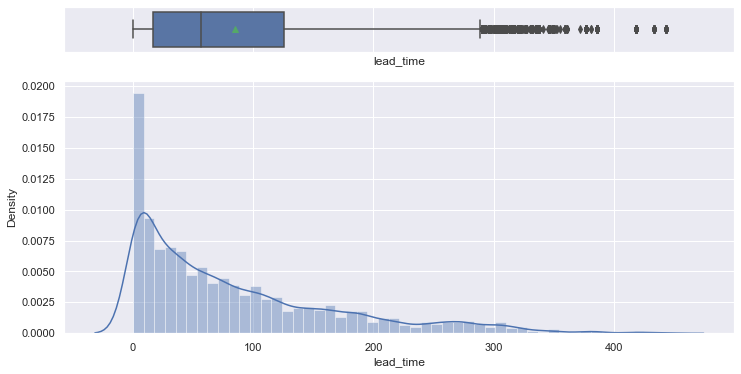%0A)

Ans 2.1 .The distribution for the lean time is right-skewed .The lead
time mostly lie between 0 to 30 days .There are some observations that
can be considered as outliers as they are very far from the upper
whisker in the boxplot

Question 2.2: Plot the histogram and box plot for the variable Average
Price per Room using the hist_box function provided and write your
insights.

In \[58\]:

    hist_box(df,"avg_price_per_room")

![](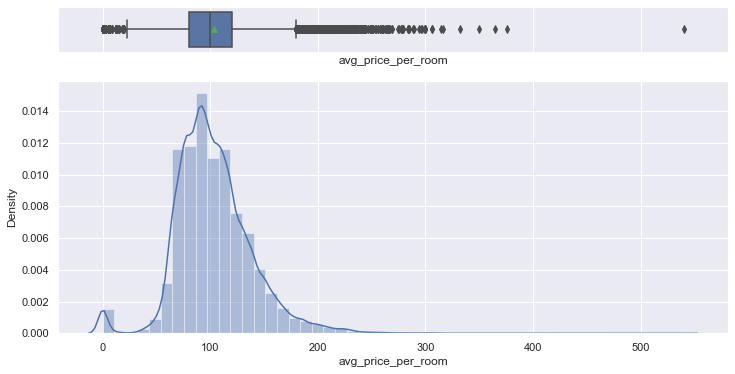%0A)

Ans 2.2 .The distribution for the avaerage price per room is almost
normally distributed .The price for most of the room range between 50 to
150 .There are some observations on the left and some observations on
the right of the boxplot which can be considered as outliers.

In \[59\]:

    data[data["avg_price_per_room"] == 0]

Out\[59\]:

|       | no_of_adults | no_of_children | no_of_weekend_nights | no_of_week_nights | type_of_meal_plan | required_car_parking_space | room_type_reserved | lead_time | arrival_year | arrival_month | arrival_date | market_segment_type | repeated_guest | no_of_previous_cancellations | no_of_previous_bookings_not_canceled | avg_price_per_room | no_of_special_requests | booking_status |
|-------|--------------|----------------|----------------------|-------------------|-------------------|----------------------------|--------------------|-----------|--------------|---------------|--------------|---------------------|----------------|------------------------------|--------------------------------------|--------------------|------------------------|----------------|
| 63    | 1            | 0              | 0                    | 1                 | Meal Plan 1       | 0                          | Room_Type 1        | 2         | 2017         | 9             | 10           | Complementary       | 0              | 0                            | 0                                    | 0.0                | 1                      | Not_Canceled   |
| 145   | 1            | 0              | 0                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 13        | 2018         | 6             | 1            | Complementary       | 1              | 3                            | 5                                    | 0.0                | 1                      | Not_Canceled   |
| 209   | 1            | 0              | 0                    | 0                 | Meal Plan 1       | 0                          | Room_Type 1        | 4         | 2018         | 2             | 27           | Complementary       | 0              | 0                            | 0                                    | 0.0                | 1                      | Not_Canceled   |
| 266   | 1            | 0              | 0                    | 2                 | Meal Plan 1       | 0                          | Room_Type 1        | 1         | 2017         | 8             | 12           | Complementary       | 1              | 0                            | 1                                    | 0.0                | 1                      | Not_Canceled   |
| 267   | 1            | 0              | 2                    | 1                 | Meal Plan 1       | 0                          | Room_Type 1        | 4         | 2017         | 8             | 23           | Complementary       | 0              | 0                            | 0                                    | 0.0                | 1                      | Not_Canceled   |
| ...   | ...          | ...            | ...                  | ...               | ...               | ...                        | ...                | ...       | ...          | ...           | ...          | ...                 | ...            | ...                          | ...                                  | ...                | ...                    | ...            |
| 35983 | 1            | 0              | 0                    | 1                 | Meal Plan 1       | 0                          | Room_Type 7        | 0         | 2018         | 6             | 7            | Complementary       | 1              | 4                            | 17                                   | 0.0                | 1                      | Not_Canceled   |
| 36080 | 1            | 0              | 1                    | 1                 | Meal Plan 1       | 0                          | Room_Type 7        | 0         | 2018         | 3             | 21           | Complementary       | 1              | 3                            | 15                                   | 0.0                | 1                      | Not_Canceled   |
| 36114 | 1            | 0              | 0                    | 1                 | Meal Plan 1       | 0                          | Room_Type 1        | 1         | 2018         | 3             | 2            | Online              | 0              | 0                            | 0                                    | 0.0                | 0                      | Not_Canceled   |
| 36217 | 2            | 0              | 2                    | 1                 | Meal Plan 1       | 0                          | Room_Type 2        | 3         | 2017         | 8             | 9            | Online              | 0              | 0                            | 0                                    | 0.0                | 2                      | Not_Canceled   |
| 36250 | 1            | 0              | 0                    | 2                 | Meal Plan 2       | 0                          | Room_Type 1        | 6         | 2017         | 12            | 10           | Online              | 0              | 0                            | 0                                    | 0.0                | 0                      | Not_Canceled   |

545 rows × 18 columns

.There are quite a few hotel rooms which have a price equal to 0. .In
the market segment column, it looks like many values are complementary.

In \[60\]:

    data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Out\[60\]:

    Complementary    354
    Online           191
    Name: market_segment_type, dtype: int64

.It makes sense that most values with room prices equal to 0 are the
rooms given as complimentary service from the hotel. .The rooms booked
online must be a part of some promotional campaign done by the hotel.

In \[61\]:

    # Calculating the 25th quantile
    Q1 = data["avg_price_per_room"].quantile(0.25)

    # Calculating the 75th quantile
    Q3 = data["avg_price_per_room"].quantile(0.75)

    # Calculating IQR
    IQR = Q3 - Q1

    # Calculating value of upper whisker
    Upper_Whisker = Q3 + 1.5 * IQR
    Upper_Whisker

Out\[61\]:

    179.55

In \[62\]:

    # assigning the outliers the value of upper whisker
    data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

Let's understand the distribution of the categorical variables

Number of Children

In \[63\]:

    sns.countplot(data['no_of_children'])
    plt.show()

![](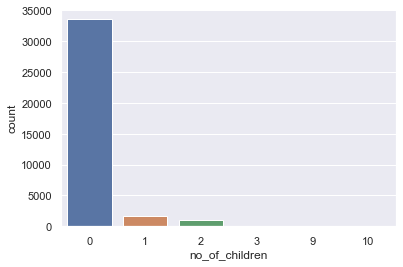%0A)

In \[64\]:

    data['no_of_children'].value_counts(normalize=True)

Out\[64\]:

    0     0.925624
    1     0.044604
    2     0.029166
    3     0.000524
    9     0.000055
    10    0.000028
    Name: no_of_children, dtype: float64

.Customers were not travelling with children in 93% of cases. .There are
some values in the data where the number of children is 9 or 10, which
is highly unlikely. .We will replace these values with the maximum value
of 3 children.

In \[65\]:

    # replacing 9, and 10 children with 3
    data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

Arrival Month

In \[66\]:

    sns.countplot(data["arrival_month"])
    plt.show()

![](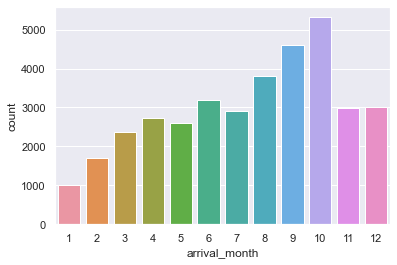%0A)

In \[67\]:

    data['arrival_month'].value_counts(normalize=True)

Out\[67\]:

    10    0.146575
    9     0.127112
    8     0.105114
    6     0.088298
    12    0.083280
    11    0.082150
    7     0.080496
    4     0.075424
    5     0.071620
    3     0.065003
    2     0.046975
    1     0.027953
    Name: arrival_month, dtype: float64

.October is the busiest month for hotel arrivals followed by September
and August. Over 35% of all bookings, as we see in the above table, were
for one of these three months. .Around 14.7% of the bookings were made
for an October arrival.

Booking Status

In \[68\]:

    sns.countplot(data["booking_status"])
    plt.show()

![](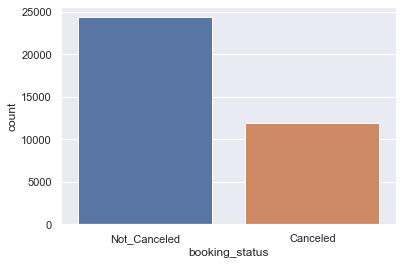%0A)

In \[69\]:

    data['booking_status'].value_counts(normalize=True)

Out\[69\]:

    Not_Canceled    0.672364
    Canceled        0.327636
    Name: booking_status, dtype: float64

32.8% of the bookings were canceled by the customers.

Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further
analysis

In \[70\]:

    data["booking_status"] = data["booking_status"].apply(
        lambda x: 1 if x == "Canceled" else 0
    )

Question 3: Bivariate Analysis

Question 3.1: Find and visualize the correlation matrix using a heatmap
and write your observations from the plot

In \[71\]:

    cols_list = data.select_dtypes(include=np.number).columns.tolist()

    plt.figure(figsize=(12, 9))
    sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
    plt.show()

![](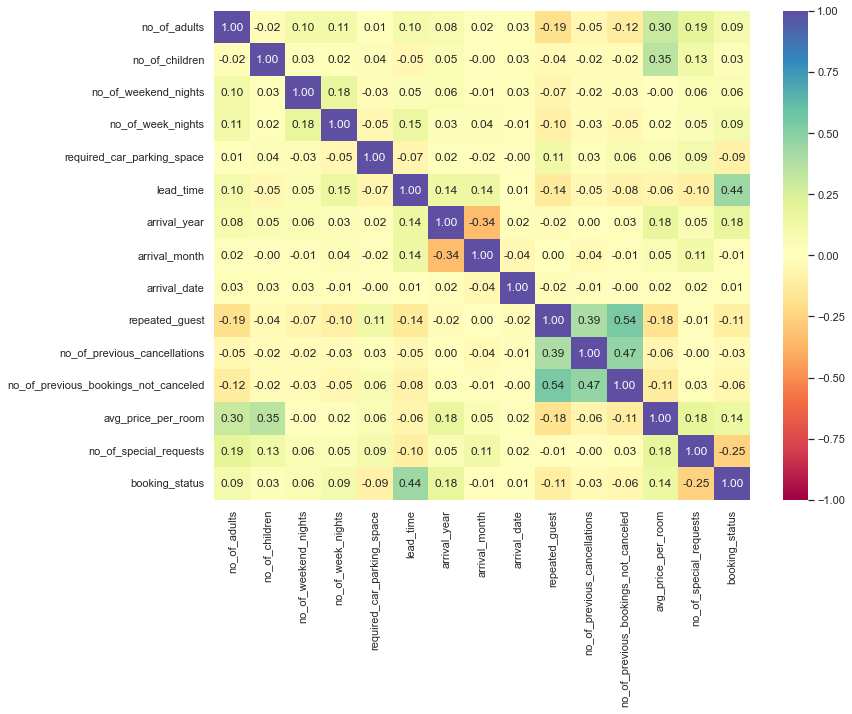%0A)

Ans 3.1 .Booking status and Lead time have high positive correlation of
0.44, as lead time increase booking status getting changed to
cancellation is high. .Number of adults and number of children againts
average room price has positive correlation of 0.47 and 0.35
respectively, means as number family members increase price increases
per room. .Repeated guests and number of previous bookings NOT cancelled
has high positive correlation of 0.54 .Lead time and repeated guests
have negative correlation, may be because as repeated guest they dont
book way early in advance. .Number of special guests and booking status
are negatively correlated by -0.25

Hotel rates are dynamic and change according to demand and customer
demographics. Let's see how prices vary across different market segments

In \[72\]:

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
    )
    plt.show()

![](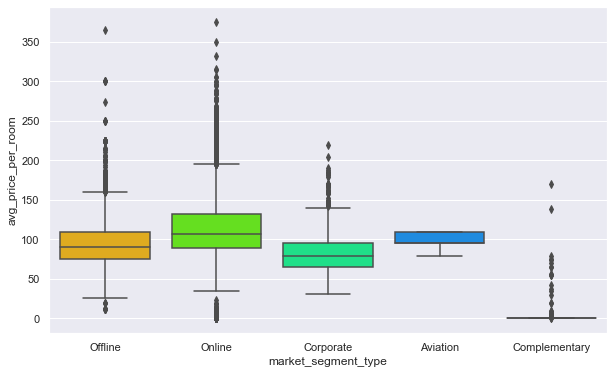%0A)

Rooms booked online have high variations in prices. The offline and
corporate room prices are almost similar. Complementary market segment
gets the rooms at very low prices, which makes sense.

We will define a stacked barplot() function to help analyse how the
target variable varies across predictor categories.

In \[73\]:

    # Defining the stacked_barplot() function
    def stacked_barplot(data,predictor,target,figsize=(10,6)):
      (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
      plt.legend(loc="lower right")
      plt.ylabel('Percentage Cancellations %')

Question 3.2: Plot the stacked barplot for the variable Market Segment
Type against the target variable Booking Status using the
stacked_barplot function provided and write your insights.

In \[74\]:

    stacked_barplot(data,"market_segment_type","booking_status")

![](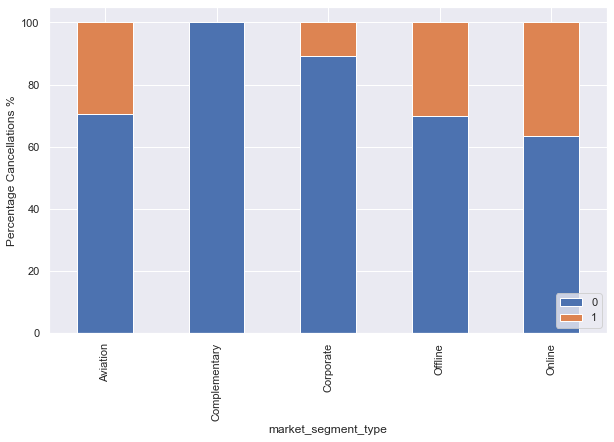%0A)

Ans 3.2 .The hotel booking made through online has higher chance of
geeting cancelled followed by Avaiation and offline. .Booking done by
corporate has less chance of getting cancelled. .Complementary bookings
never get cancelled because of obvious reason its free.

Let's analyze the customer who stayed for at least a day at the hotel.

In \[75\]:

    stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
    stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

    stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

![](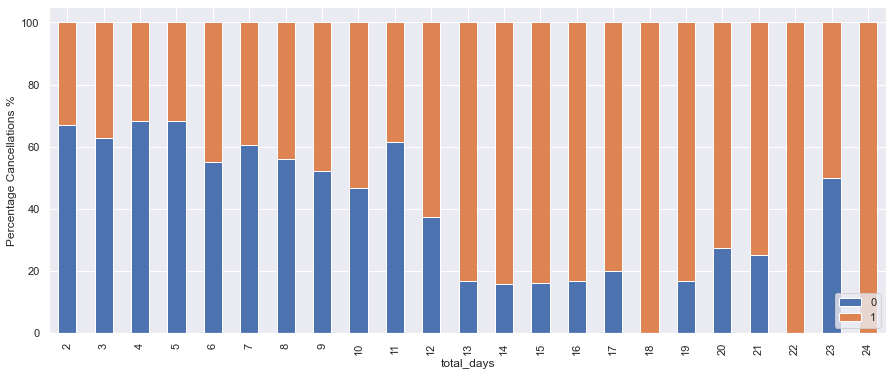%0A)

The general trend is that the chances of cancellation increase as the
number of days the customer planned to stay at the hotel increases.

As hotel room prices are dynamic, Let's see how the prices vary across
different months

In \[76\]:

    plt.figure(figsize=(10, 5))
    sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
    plt.show()

![](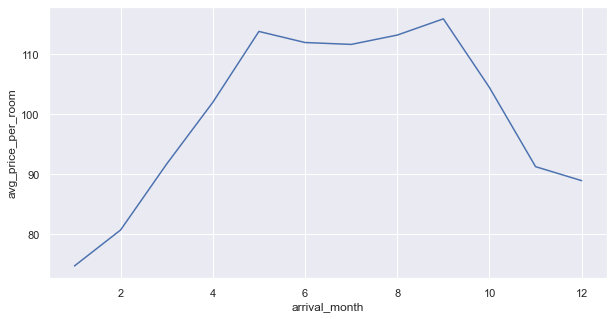%0A)

.The price of rooms is highest in May to September - around 115 euros
per room.

Data Preparation for Modeling

We want to predict which bookings will be canceled. Before we proceed to
build a model, we'll have to encode categorical features. We'll split
the data into train and test to be able to evaluate the model that we
build on the train data.

Separating the independent variables (X) and the dependent variable (Y)

In \[77\]:

    X = data.drop(["booking_status"], axis=1)
    Y = data["booking_status"]

    X = pd.get_dummies(X, drop_first=True) 

Splitting the data into a 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the
distribution of the target classes: for instance there could be several
times more negative samples than positive samples. In such cases it is
recommended to use the stratified sampling technique to ensure that
relative class frequencies are approximately preserved in each train and
validation fold.

In \[78\]:

    # Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In \[79\]:

    print("Shape of Training set : ", X_train.shape)
    print("Shape of test set : ", X_test.shape)
    print("Percentage of classes in training set:")
    print(y_train.value_counts(normalize=True))
    print("Percentage of classes in test set:")
    print(y_test.value_counts(normalize=True))

    Shape of Training set :  (25392, 27)
    Shape of test set :  (10883, 27)
    Percentage of classes in training set:
    0    0.672377
    1    0.327623
    Name: booking_status, dtype: float64
    Percentage of classes in test set:
    0    0.672333
    1    0.327667
    Name: booking_status, dtype: float64

Model Evaluation Criterion

Model can make wrong predictions as:

1.Predicting a customer will not cancel their booking but in reality,
the customer will cancel their booking. 2.Predicting a customer will
cancel their booking but in reality, the customer will not cancel their
booking.

Which case is more important?

Both the cases are important as:

.If we predict that a booking will not be canceled and the booking gets
canceled then the hotel will lose resources and will have to bear
additional costs of distribution channels.

.If we predict that a booking will get canceled and the booking doesn't
get canceled the hotel might not be able to provide satisfactory
services to the customer by assuming that this booking will be canceled.
This might damage brand equity.

How to reduce the losses?

.The hotel would want the F1 Score to be maximized, the greater the F1
score, the higher the chances of minimizing False Negatives and False
Positives.

Also, let's create a function to calculate and print the classification
report and confusion matrix so that we don't have to rewrite the same
code repeatedly for each model.

In \[80\]:

    # Creating metric function 
    def metrics_score(actual, predicted):
        print(classification_report(actual, predicted))

        cm = confusion_matrix(actual, predicted)
        plt.figure(figsize=(8,5))
        
        sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

Building the model We will be building 4 different models:

.Logistic Regression .Support Vector Machine (SVM) .Decision Tree
.Random Forest

Question 4: Logistic Regression

Question 4.1: Build a Logistic Regression model (Use the sklearn
library)

In \[81\]:

    # Fitting logistic regression model
    lg = LogisticRegression()
    lg.fit(X_train,y_train)

Out\[81\]:

    LogisticRegression()

Question 4.2: Check the performance of the model on train and test data

In \[82\]:

    # Checking the performance on the training data
    y_pred_train = lg.predict(X_train)
    metrics_score(y_train, y_pred_train)

                  precision    recall  f1-score   support

               0       0.83      0.89      0.86     17073
               1       0.74      0.61      0.67      8319

        accuracy                           0.80     25392
       macro avg       0.78      0.75      0.76     25392
    weighted avg       0.80      0.80      0.80     25392

![](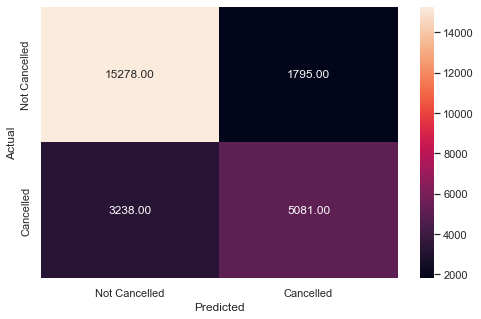%0A)

Ans 4.2 We have been able to build a predictive model that can be used
by the Inn Hotel company to predict the Booking status who are likely to
cancel the booking with a recall score of 61% and precision of 74%

Let's check the performance on the test set

In \[83\]:

    # Checking the performance on the test dataset
    y_pred_test = lg.predict(X_test)
    metrics_score(y_test, y_pred_test)

                  precision    recall  f1-score   support

               0       0.82      0.89      0.85      7317
               1       0.73      0.60      0.66      3566

        accuracy                           0.80     10883
       macro avg       0.77      0.75      0.76     10883
    weighted avg       0.79      0.80      0.79     10883

![](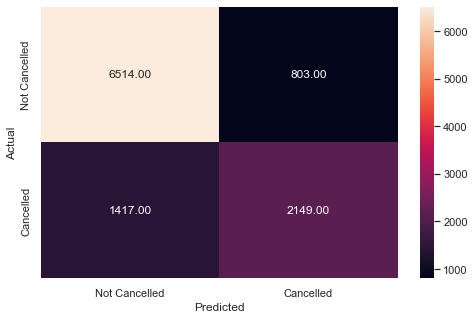%0A)

Ans The test set gives a recall of 60% and precesion of 73% which is
almost equal to training set

Question 4.3: Find the optimal threshold for the model using the
Precision-Recall Curve.

Precision-Recall curves summarize the trade-off between the true
positive rate and the positive predictive value for a predictive model
using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a better
threshold.

In \[84\]:

    # Predict_proba gives the probability of each observation belonging to each class
    y_scores_lg=lg.predict_proba(X_train)

    precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

    # Plot values of precisions, recalls, and thresholds
    plt.figure(figsize=(10,7))
    plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
    plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    plt.show()

![](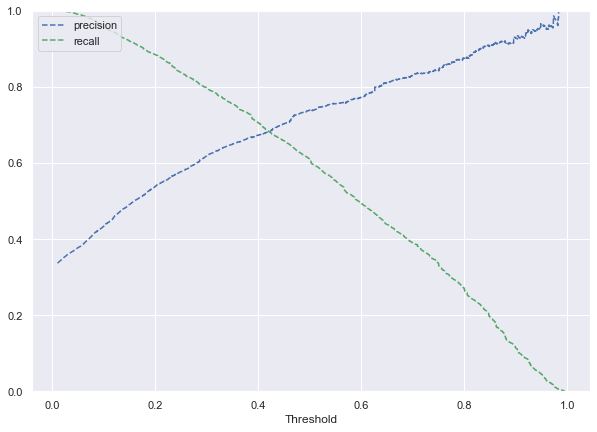%0A)

Ans 4.3 We want to choose a threshold that has a high recall while also
having a small drop in precision. As per the above curve we can consider
threshold value of 0.42

In \[85\]:

    # Setting the optimal threshold
    optimal_threshold = 0.42

Question 4.4: Check the performance of the model on train and test data
using the optimal threshold.

In \[86\]:

    # Creating confusion matrix
    y_pred_train = lg.predict_proba(X_train)
    metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

                  precision    recall  f1-score   support

               0       0.85      0.84      0.84     17073
               1       0.68      0.68      0.68      8319

        accuracy                           0.79     25392
       macro avg       0.76      0.76      0.76     25392
    weighted avg       0.79      0.79      0.79     25392

![](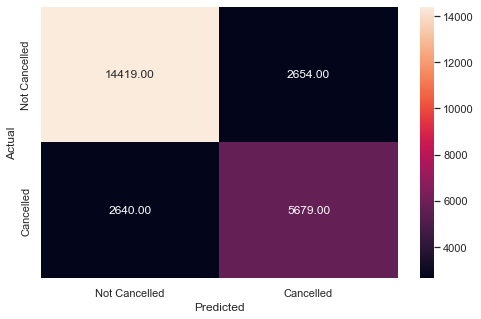%0A)

Ans4.4 The model performance has improved little bit as compared to our
initial model.The recall has increased to 68% from 60%

Let's check the performance on the test set

In \[87\]:

    y_pred_test = lg.predict_proba(X_test)
    metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

                  precision    recall  f1-score   support

               0       0.84      0.84      0.84      7317
               1       0.68      0.67      0.67      3566

        accuracy                           0.79     10883
       macro avg       0.76      0.76      0.76     10883
    weighted avg       0.79      0.79      0.79     10883

![](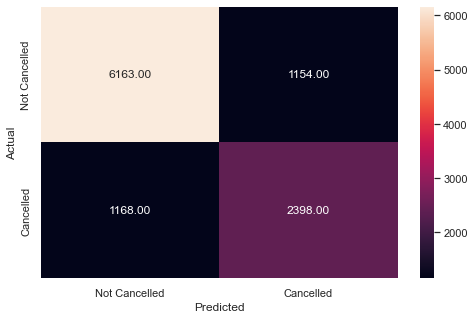%0A)

Ans Using the model with a threshold of 0.42, the model has achieved a
recall of 67% and Precision of 68%.

Question 5: Support Vector Machines

To accelerate SVM training, let's scale the data for support vector
machines

In \[62\]:

    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train_scaled = scaling.transform(X_train)
    X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel
functions:

.Linear Kernel .RBF Kernel

Question 5.1: Build a Support Vector Machine model using a linear kernel

In \[70\]:

    svm = SVC(kernel='linear')
    model = svm.fit(X= X_train_scaled, y = y_train)

Question 5.2: Check the performance of the model on train and test data

In \[69\]:

    y_pred_train_svm = model.predict(X_train_scaled)
    metrics_score(y_train, y_pred_train_svm)

                  precision    recall  f1-score   support

               0       0.83      0.90      0.86     17073
               1       0.74      0.61      0.67      8319

        accuracy                           0.80     25392
       macro avg       0.79      0.76      0.77     25392
    weighted avg       0.80      0.80      0.80     25392

![](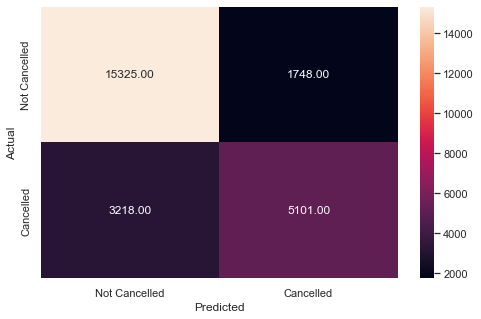%0A)

Ans 5.2 This model has a recall of 61% and achived precision of 74%

Check model performance on testing set

In \[74\]:

    y_pred_test_svm = model.predict(X_test_scaled)
    metrics_score(y_test, y_pred_test_svm)

                  precision    recall  f1-score   support

               0       0.82      0.90      0.86      7317
               1       0.74      0.61      0.67      3566

        accuracy                           0.80     10883
       macro avg       0.78      0.75      0.76     10883
    weighted avg       0.80      0.80      0.80     10883

![](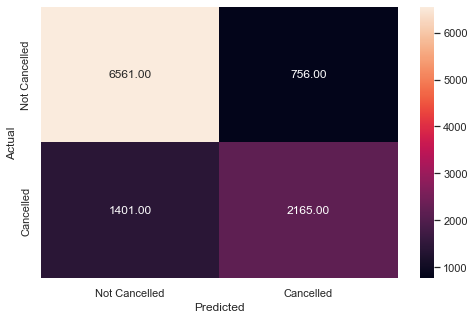%0A)

ANS5.2 Test set got a recall value of 61% and precision of 74%

Question 5.3: Find the optimal threshold for the model using the
Precision-Recall Curve.

In \[92\]:

    # Predict on train data
    y_scores_svm=model.predict(X_train_scaled)

    precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm)

    # Plot values of precisions, recalls, and thresholds
    plt.figure(figsize=(10,7))
    plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
    plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    plt.show()

![](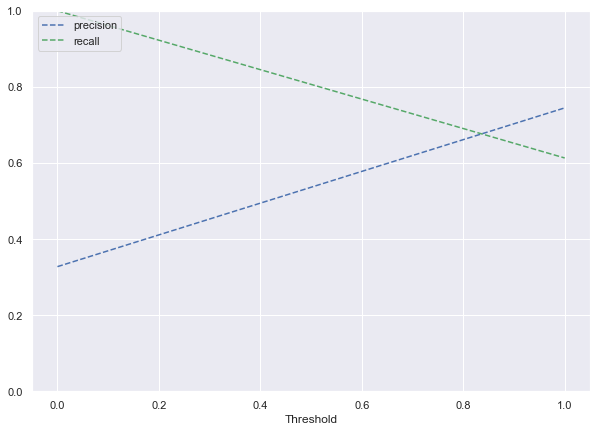%0A)

Ans

In \[94\]:

    optimal_threshold_svm=0.85

Question 5.4: Check the performance of the model on train and test data
using the optimal threshold

In \[95\]:

    y_pred_train_svm = model.predict(X_train_scaled)
    metrics_score(y_train, y_pred_train_svm >optimal_threshold_svm)

                  precision    recall  f1-score   support

               0       0.83      0.90      0.86     17073
               1       0.74      0.61      0.67      8319

        accuracy                           0.80     25392
       macro avg       0.79      0.76      0.77     25392
    weighted avg       0.80      0.80      0.80     25392

![](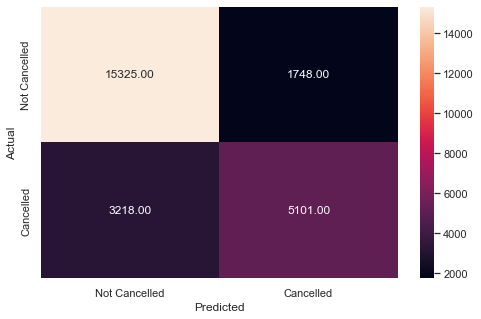%0A)

Ans5.4 With the new threshold the recal value we get is 61% and
precision of 74%, there is no much change in the values

In \[98\]:

    y_pred_test = model.predict(X_test_scaled)
    metrics_score(y_test, y_pred_test>optimal_threshold_svm)

                  precision    recall  f1-score   support

               0       0.82      0.90      0.86      7317
               1       0.74      0.61      0.67      3566

        accuracy                           0.80     10883
       macro avg       0.78      0.75      0.76     10883
    weighted avg       0.80      0.80      0.80     10883

![](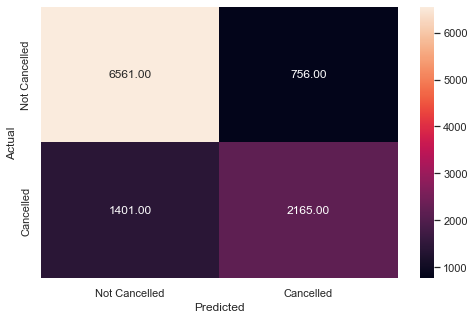%0A)

Question 5.5: Build a Support Vector Machines model using an RBF kernel

In \[103\]:

    svm_rbf=SVC(kernel='rbf',probability=True)
    svm_rbf.fit(X_train_scaled,y_train)

Out\[103\]:

    SVC(probability=True)

Question 5.6: Check the performance of the model on train and test data

In \[104\]:

    y_pred_train_svm = svm_rbf.predict(X_train_scaled)
    metrics_score(y_train, y_pred_train_svm)

                  precision    recall  f1-score   support

               0       0.84      0.91      0.88     17073
               1       0.79      0.65      0.71      8319

        accuracy                           0.83     25392
       macro avg       0.81      0.78      0.80     25392
    weighted avg       0.82      0.83      0.82     25392

![](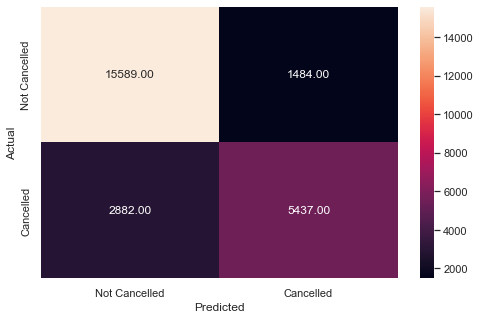%0A)

Ans 5.6 When compared to the baseline svm model with linear kernel, the
model's performance on training data has been slightly improved by using
an RBF kernel.

Checking model performance on test set

In \[105\]:

    y_pred_test = svm_rbf.predict(X_test_scaled)

    metrics_score(y_test, y_pred_test)

                  precision    recall  f1-score   support

               0       0.84      0.91      0.87      7317
               1       0.78      0.63      0.70      3566

        accuracy                           0.82     10883
       macro avg       0.81      0.77      0.78     10883
    weighted avg       0.82      0.82      0.81     10883

![](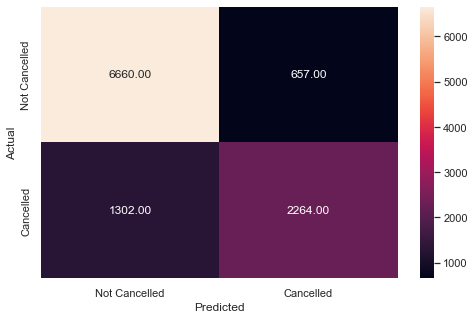%0A)

Ans When compared to the baseline svm model with linear kernel, the
recall score on testing data has increased to 63% and precision of 78%

In \[106\]:

    y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

    precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

    # Plot values of precisions, recalls, and thresholds
    plt.figure(figsize=(10,7))
    plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
    plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    plt.show()

![](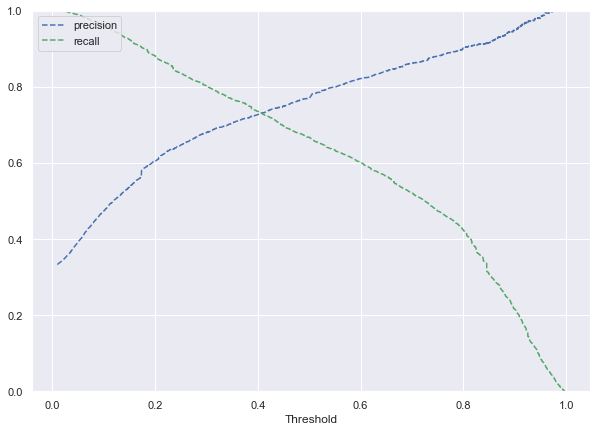%0A)

In \[107\]:

    optimal_threshold_svm=0.4

Question 5.7: Check the performance of the model on train and test data
using the optimal threshold.

Checking model performance on training set

In \[110\]:

    y_pred_train_svm = model.predict(X_train_scaled)
    metrics_score(y_train, y_pred_train_svm >optimal_threshold_svm)

                  precision    recall  f1-score   support

               0       0.83      0.90      0.86     17073
               1       0.74      0.61      0.67      8319

        accuracy                           0.80     25392
       macro avg       0.79      0.76      0.77     25392
    weighted avg       0.80      0.80      0.80     25392

![](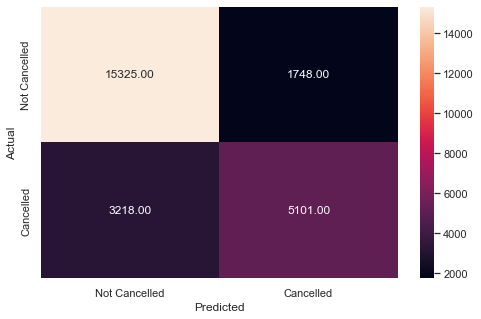%0A)

Ans 5.7 SVM model with RBF kernel performance not changed much compared
to the linear kernel. The model has achieved a recall score of 0.61 and
precision value 74%

In \[111\]:

    y_pred_test = svm_rbf.predict_proba(X_test_scaled)
    metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

                  precision    recall  f1-score   support

               0       0.87      0.86      0.86      7317
               1       0.72      0.73      0.72      3566

        accuracy                           0.82     10883
       macro avg       0.79      0.79      0.79     10883
    weighted avg       0.82      0.82      0.82     10883

![](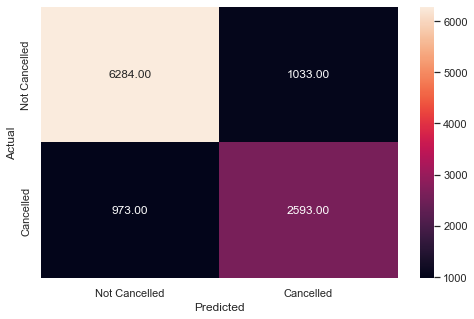%0A)

Ans The recal score is around 73% and precesion is around 72%

Question 6: Decision Trees

Question 6.1: Build a Decision Tree Model

In \[112\]:

    model_dt = DecisionTreeClassifier(random_state=1)
    model_dt.fit(X_train, y_train)

Out\[112\]:

    DecisionTreeClassifier(random_state=1)

Question 6.2: Check the performance of the model on train and test data

In \[113\]:

    pred_train_dt = model_dt.predict(X_train)
    metrics_score(y_train, pred_train_dt)

                  precision    recall  f1-score   support

               0       0.99      1.00      1.00     17073
               1       1.00      0.99      0.99      8319

        accuracy                           0.99     25392
       macro avg       1.00      0.99      0.99     25392
    weighted avg       0.99      0.99      0.99     25392

![](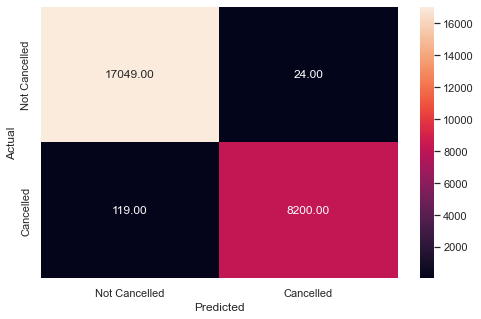%0A)

Ans The errors on the training set is 24 and 119 which is much less,
each sample has been classified correctly. Model has performed very well
on the training set.

Checking model performance on test set

In \[114\]:

    pred_test_dt = model_dt.predict(X_test)
    metrics_score(y_test, pred_test_dt)

                  precision    recall  f1-score   support

               0       0.90      0.90      0.90      7317
               1       0.79      0.79      0.79      3566

        accuracy                           0.87     10883
       macro avg       0.85      0.85      0.85     10883
    weighted avg       0.87      0.87      0.87     10883

![](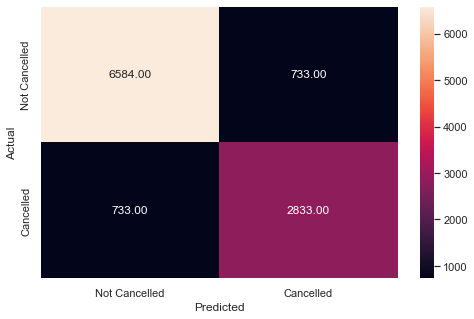%0A)

Ans 6.2 The decision tree model is clearly overfitting. However the
decision tree has better performance compared to Logistic Regression and
SVM models. We will have to tune the decision tree to reduce the
overfitting.

Question 6.3: Perform hyperparameter tuning for the decision tree model
using GridSearch CV

In \[115\]:

    # Choose the type of classifier.
    estimator = DecisionTreeClassifier(random_state=1)

    # Grid of parameters to choose from
    parameters = {
        "max_depth": np.arange(1,100,10),
        "max_leaf_nodes": [50, 75, 150, 250],
        "min_samples_split": [10, 30, 50, 70],
    }
    # Run the grid search
    grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    estimator = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    estimator.fit(X_train, y_train)

Out\[115\]:

    DecisionTreeClassifier(max_depth=11, max_leaf_nodes=250, min_samples_split=10,
                           random_state=1)

Question 6.4: Check the performance of the model on the train and test
data using the tuned model

Checking performance on the training set

In \[116\]:

    # Checking performance on the training dataset
    dt_tuned = estimator.predict(X_train)
    metrics_score(y_train,dt_tuned)

                  precision    recall  f1-score   support

               0       0.91      0.93      0.92     17073
               1       0.85      0.81      0.83      8319

        accuracy                           0.89     25392
       macro avg       0.88      0.87      0.87     25392
    weighted avg       0.89      0.89      0.89     25392

![](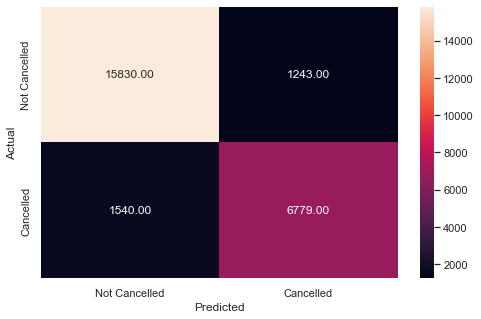%0A)

In \[117\]:

    # Checking performance on the training dataset
    y_pred_tuned = estimator.predict(X_test)
    metrics_score(y_test,y_pred_tuned)

                  precision    recall  f1-score   support

               0       0.90      0.92      0.91      7317
               1       0.82      0.78      0.80      3566

        accuracy                           0.87     10883
       macro avg       0.86      0.85      0.85     10883
    weighted avg       0.87      0.87      0.87     10883

![](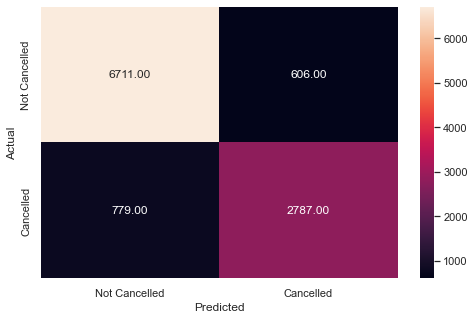%0A)

Ans 6.4 Decision tree model with default parameters is overfitting the
training data and is not able to generalize well. Tuned moded has
provided a generalised performance with balanced precision and recall
values. However, there is still some overfitting, and model performance
on test data has not significantly improved.

Visualizing the Decision Tree

In \[118\]:

    feature_names = list(X_train.columns)
    plt.figure(figsize=(20, 10))
    out = tree.plot_tree(
        estimator,max_depth=3,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

![](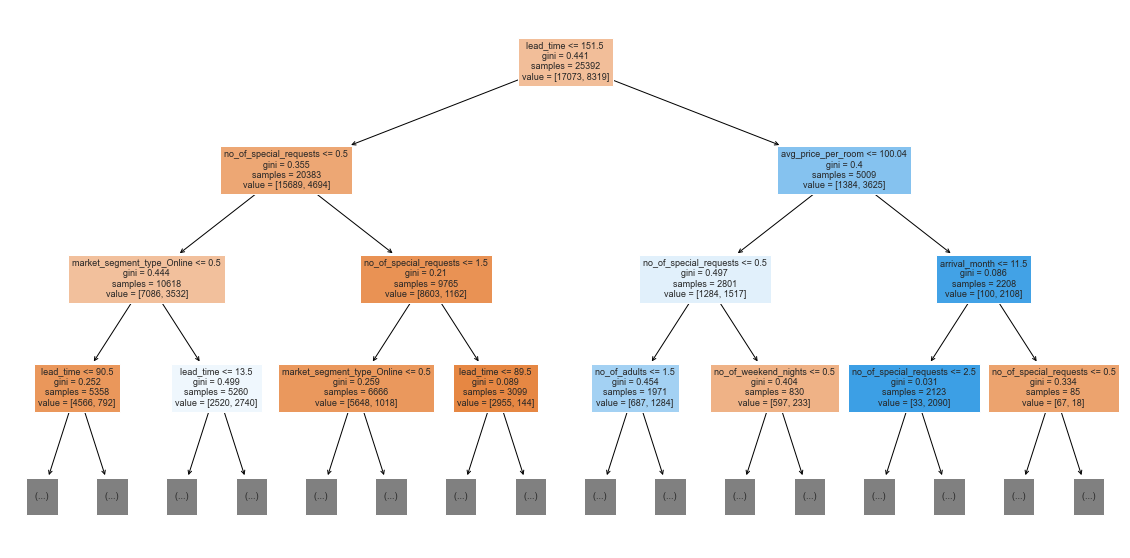%0A)

Question 6.5: What are some important features based on the tuned
decision tree?

In \[119\]:

    # Importance of features in the tree building
    importances = model_dt.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(8, 8))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

![](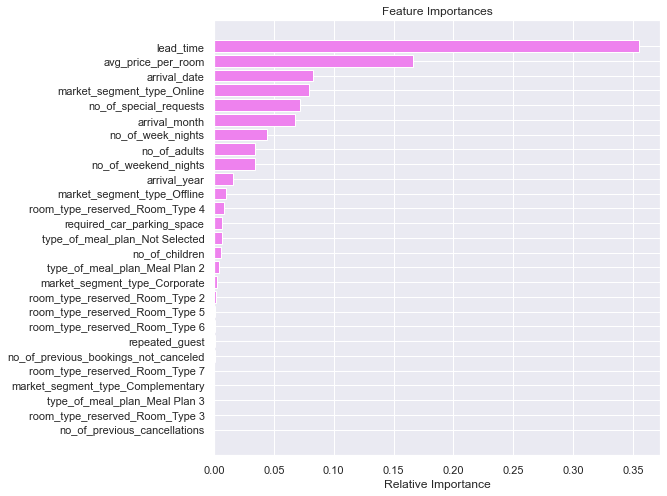%0A)

Ans 6.5 We can see that the tree has become simpler and the rules of the
trees are readable. The model performance of the model has been
generalized. We observe that the most important features are: Lead Time
Average price per room Arrival date Online booking has significant
affect on Booking Cancellations

Question 7: Random Forest

Question 7.1: Build a Random Forest Model

In \[120\]:

    rf_estimator = RandomForestClassifier( random_state = 1)

    rf_estimator.fit(X_train, y_train)

Out\[120\]:

    RandomForestClassifier(random_state=1)

Question 7.2: Check the performance of the model on the train and test
data

In \[121\]:

    y_pred_train_rf = rf_estimator.predict(X_train)

    metrics_score(y_train, y_pred_train_rf)

                  precision    recall  f1-score   support

               0       0.99      1.00      1.00     17073
               1       1.00      0.99      0.99      8319

        accuracy                           0.99     25392
       macro avg       0.99      0.99      0.99     25392
    weighted avg       0.99      0.99      0.99     25392

![](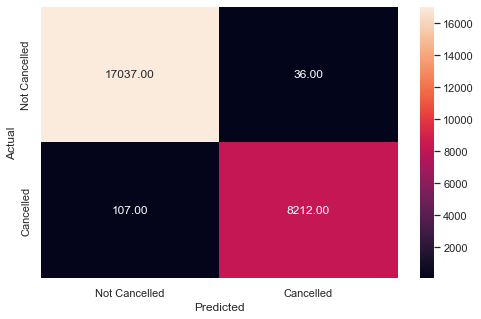%0A)

Ans 7.2 The Errors are very less on training set, each sample has been
classified correctly. Model performed well on training set

In \[122\]:

    y_pred_test_rf = rf_estimator.predict(X_test)

    metrics_score(y_test, y_pred_test_rf)

                  precision    recall  f1-score   support

               0       0.91      0.95      0.93      7317
               1       0.88      0.80      0.84      3566

        accuracy                           0.90     10883
       macro avg       0.90      0.88      0.88     10883
    weighted avg       0.90      0.90      0.90     10883

![](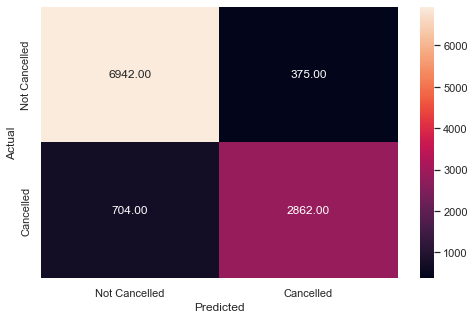%0A)

Ans The Random Forest classifier seems to be overfitting. The recall
score is 0.80 which is low compared to other models. We can reduce
overfitting and improve recall by hyperparameter tuning.

Question 7.3: What are some important features based on the Random
Forest?

Let's check the feature importance of the Random Forest

In \[123\]:

    importances = rf_estimator.feature_importances_

    columns = X.columns

    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


    plt.figure(figsize=(13, 13))

    sns.barplot(importance_df.Importance, importance_df.index)

Out\[123\]:

    <AxesSubplot:xlabel='Importance'>

![](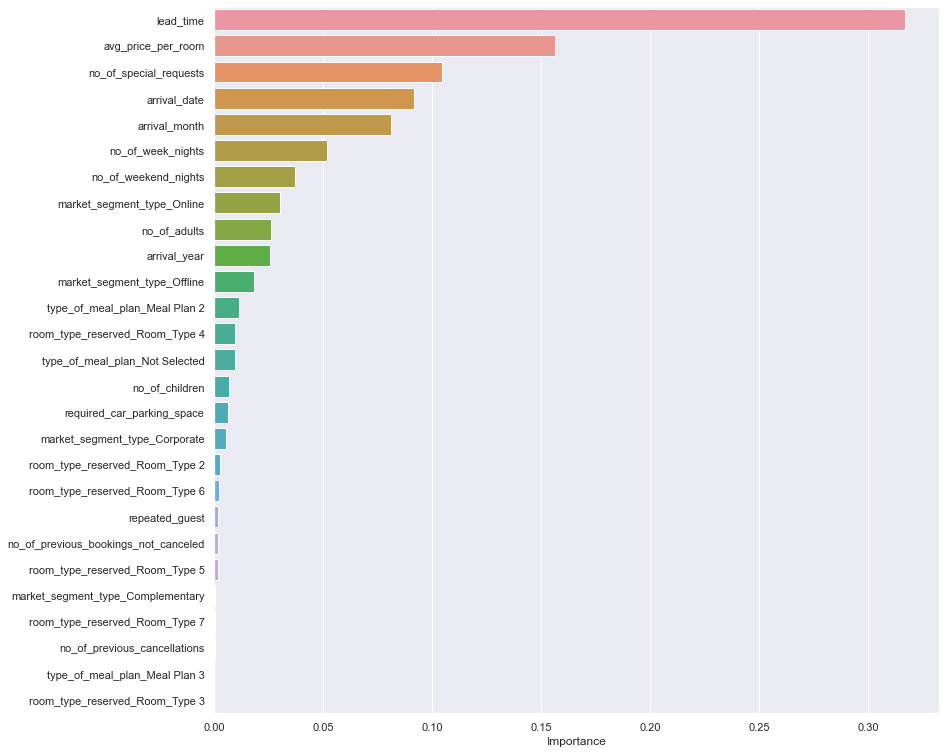%0A)

Ans 7.3 . Random forest clarifies the Lead time is the major factor
which is affecting the booking cancellation. Higher the lead time,
chances of Booking getting cancelled is high. . Along with Lead time,
avarage price per room, number of special requests, arrival date and
month also majorly contribute to the cancellation of booking. .Among the
mraket segment hotel booked online have higher chance of getting
cancelled.

Question 8: Conclude ANY FOUR key takeaways for business recommendations

Ans 8 .Lead time where customers booked hotel in advance has higher rate
of cancellation. This issue can be solved by using Advance purchase
bookings with certain discounts. .Can impliment some cancellation
charges if cancelled 2 days before the arrival which provide time to
advertise the cancelled room to rebooked by other customers. .Average
price per room as it increase cancellation is also increasing. We can
set a non refundable discounted rates, collect deposits. .Can implement
more rigid cancellation policies for online booking. .Hotels should
consider total number of special requests from guests to reduce the
possibility of cancellation .For online booking need to check from which
online marketing portal more cancellations are coming and can also
encourage direct booking by providing some discounts.